# **Сравнение метрик простой модели и бустинга**

In [30]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [31]:
wine = load_wine()
X = wine.data 
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


wine_reg = DecisionTreeRegressor(max_depth=2)
wine_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

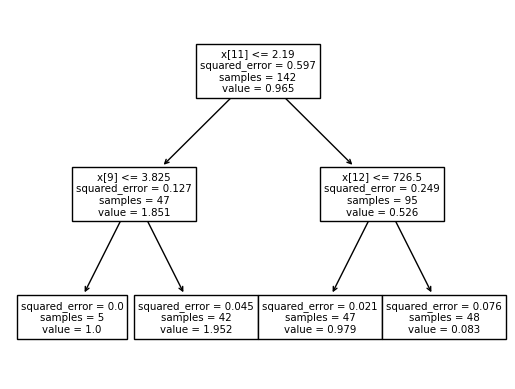

In [32]:
plot_tree(wine_reg);

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = wine_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)


print("MAE = ", mae)
print("MSE = ", mse)

MAE =  0.12904564899245752
MSE =  0.13424658285677338


In [52]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.8 MB/s eta 0:00:00


In [58]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor


X = np.round(X) 
X = X.astype(int) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=1000,  
                          learning_rate=0.1, 
                          depth=2,  
                          random_state=42)  

model.fit(X_train, y_train, verbose=100)  
y_pred = model.predict(X_test)

# Оценка качества модели
mse_catboost = np.mean((y_test - y_pred) ** 2)  
mae_catboost = np.mean((y_test - y_pred))

print("MAE_CB = ", mae_catboost)
print("MSE_CB = ", mse_catboost)

0:	learn: 0.7278756	total: 244us	remaining: 244ms
100:	learn: 0.1439201	total: 21.7ms	remaining: 193ms
200:	learn: 0.1153588	total: 50.7ms	remaining: 202ms
300:	learn: 0.0937457	total: 76.2ms	remaining: 177ms
400:	learn: 0.0806074	total: 102ms	remaining: 152ms
500:	learn: 0.0698266	total: 121ms	remaining: 121ms
600:	learn: 0.0628590	total: 145ms	remaining: 96.2ms
700:	learn: 0.0570540	total: 166ms	remaining: 70.6ms
800:	learn: 0.0517884	total: 186ms	remaining: 46.3ms
900:	learn: 0.0473942	total: 211ms	remaining: 23.2ms
999:	learn: 0.0434640	total: 233ms	remaining: 0us
MAE_CB =  0.022253510733405465
MSE_CB =  0.03490737164473215


In [59]:
print("Метрики простой модели:")
print("MAE = ", mae)
print("MSE = ", mse)

print("\nМетрики СatВoost:")
print("MAE_CB = ", mae_catboost)
print("MSE_CB = ", mse_catboost)

Метрики простой модели:
MAE =  0.12904564899245752
MSE =  0.13424658285677338

Метрики СatВoost:
MAE_CB =  0.022253510733405465
MSE_CB =  0.03490737164473215


# **Бустинг LightGBM**

In [64]:
 !pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = np.round(X)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(num_leaves=31,  
                          learning_rate=0.1,  
                          n_estimators=100,  
                          random_state=42)  
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)

mse_lightgbm = np.mean((y_test - y_pred) ** 2)  
mae_lightgbm = np.mean((y_test - y_pred))

print("MAE_lightgbm = ", mae_lightgbm)
print("MSE_lightgbm = ", mse_lightgbm)

MAE_lightgbm =  0.01054480523415597
MSE_lightgbm =  0.03439855505478344


# **Подбор наилучших гиперпараметров для CatBoost**

In [63]:
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()
param_grid = {
    'learning_rate': [0.1, 0.2],
    'depth': [2, 3, 4],
    'iterations': [900, 1000]
}

grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение RMSE на тестовом наборе: ", 
      np.sqrt(grid_search.score(X_test, y_test)))

Выходные данные были обрезаны до нескольких последних строк (5000).
2:	learn: 0.6273087	total: 1.58ms	remaining: 525ms
3:	learn: 0.5984971	total: 2.01ms	remaining: 500ms
4:	learn: 0.5591499	total: 2.42ms	remaining: 481ms
5:	learn: 0.5292475	total: 2.78ms	remaining: 460ms
6:	learn: 0.4999598	total: 3.16ms	remaining: 449ms
7:	learn: 0.4730047	total: 3.52ms	remaining: 437ms
8:	learn: 0.4403091	total: 3.88ms	remaining: 428ms
9:	learn: 0.4143048	total: 4.25ms	remaining: 421ms
10:	learn: 0.3892171	total: 4.67ms	remaining: 420ms
11:	learn: 0.3669673	total: 5.06ms	remaining: 416ms
12:	learn: 0.3485805	total: 5.7ms	remaining: 433ms
13:	learn: 0.3338229	total: 7.41ms	remaining: 522ms
14:	learn: 0.3148485	total: 7.85ms	remaining: 516ms
15:	learn: 0.2963470	total: 8.22ms	remaining: 506ms
16:	learn: 0.2822126	total: 8.61ms	remaining: 498ms
17:	learn: 0.2730499	total: 8.97ms	remaining: 490ms
18:	learn: 0.2575444	total: 9.33ms	remaining: 482ms
19:	learn: 0.2433136	total: 9.67ms	remaining: 474ms
20:	l

# **Подбор наилучших параметров для LightGBM**

In [73]:
model = lgb.LGBMRegressor()
param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'num_leaves': [31, 41]
}

grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение RMSE на тестовом наборе: ", 
      np.sqrt(grid_search.score(X_test, y_test)))

Наилучшие параметры:  {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
Наилучшее значение RMSE на тестовом наборе:  0.9742261176517144
